In [4]:
 #! pip install -q kaggle

In [5]:
#from google.colab import files

#files.upload()

In [6]:
#! mkdir ~/.kaggle

In [7]:
#! cp kaggle.json ~/.kaggle/

In [8]:
 #! chmod 600 ~/.kaggle/kaggle.json

In [9]:
#! kaggle datasets list

In [10]:
#! ls -l ~/.kaggle

In [11]:
#! kaggle competitions download -c credit-card-fraud-detection

In [12]:
#!pip show kaggle

##Problem

Credit Card Fraud Detection_ Anonymized credit card transactions labeled as fraudulent or genuine

https://www.kaggle.com/mlg-ulb/creditcardfraud

##Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders.


This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.


##Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.


##Reading:
A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/frauddetection-
handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.


##Challenges:
The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for imbalanced classification.

##Opportunities
- Test and compare different models: Neural Network, Decision Tree, Random Forest,
Logistic Regression, undersampling
Further reading: https://www.kaggle.com/adamml/fraud-detection-models-comparison
- Tackle imbalanced dataset:
Further reading: https://www.kaggle.com/ahmedhaytham/solutions-for-imbalanced-data
Initial proposal: oversample, undersample or randomly pick for batch job
- Missing data: SMOTE, etc.
- Feel free to approach other problems and come up with better solution

##Target: 
compare the ML models’ performance and find which one is the best for this problem

In [13]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [14]:
import csv
from google.colab import drive

In [15]:
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!ls /content/drive/MyDrive/Data

creditcard.csv	hymenoptera_data  product.csv


In [17]:
df= pd.read_csv('/content/drive/My Drive/Data/creditcard.csv', sep=',')#, index_col='id')

In [18]:
df.sample(n=20, random_state=42)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,-2.084080,0.480381,0.473738,-2.192276,0.773942,0.294484,0.406074,-0.541855,1.031450,0.017076,0.618411,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
260880,159763.0,2.023952,-0.120140,-1.086918,0.423019,-0.142901,-1.127752,0.178493,-0.303234,0.564509,0.062831,-0.720047,0.366835,-0.110857,0.319094,0.108359,-0.153633,-0.221312,-0.934141,0.070553,-0.210864,-0.276175,-0.697708,0.335631,-0.017196,-0.324904,0.200023,-0.071566,-0.058224,16.99,0
214337,139631.0,-0.688944,1.292153,-0.564281,-1.457526,2.258333,-0.323270,1.678984,-0.104128,-1.285351,-1.303435,0.282728,-0.402525,-0.548687,-0.504283,-0.685339,0.714828,-0.092674,0.798953,-0.150085,-0.037150,-0.006880,-0.171568,-0.720019,-0.419435,1.211991,0.670916,-0.103986,0.030084,8.95,0
201575,133944.0,2.119362,0.142639,-2.373337,0.541949,0.608419,-1.775564,0.955775,-0.599383,0.010420,0.295305,-0.936569,-0.452478,-1.340798,1.077459,-0.099584,-0.815072,0.018481,-0.639446,-0.065427,-0.323573,0.264264,0.898266,-0.168063,0.059311,0.626949,0.729035,-0.129120,-0.094713,10.00,0
81055,58769.0,-5.584256,-4.732413,-0.448452,-0.121442,-0.707412,-0.114376,-1.554628,1.402126,-0.031693,-0.942358,-2.439501,-0.552312,-0.295588,-0.250246,-1.197732,1.549553,0.933237,-1.237689,0.416832,-1.046900,0.041651,0.621789,0.223467,-0.770137,0.621182,-0.028738,0.505194,-1.898323,101.49,0


Text(0, 0.5, 'Frequency')

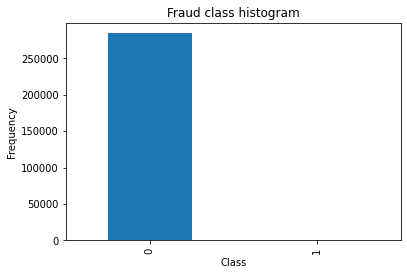

In [19]:
# Let's check the target classes

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind='bar')
plt.title('Fraud class histogram')
plt.xlabel("Class")
plt.ylabel("Frequency")

it is obvious that the data is unbalanced.


# Introduction 

In this kernel, we will use various predictive models to see how accurate they are in detecting whether a transaction is a normal payment or a fraud. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. Nevertheless, we can still analyze some important aspects of the dataset. 

# Our goals

- Understand the little distribution of the "little" data that is provided to us 
- Create a 50/50 sub-dataframe ratio of "Fraud" and "Non-fraud" transactions (NearMiss Algorithm)
- Determine the classifiers we are going to use and decide which one is has a higher ccuracy 
- Create a neural network and compare the accuracy to our best classifier
- Understand common mistakes made with unbalanced dataset

# The outline of this work

1. Understand the dataset
-  Gather sense of the provided data


2. Preprocessing
- Scaling and Distributing 
- Splitting the data 

3. Random Undersampling and Oversampling 
- Distributing and correlating 
- Anomaly detection 
- Dimensionality Reduction and Clustering (t-SNE)
- Classifiers
- A deeper look into Logistic Regression 
- Oversampling with SMOTE

4. Testing 
- Testing with Logistic Regression 
- Neural Network Testing (Undersampling and Oversampling)



# Reminder about dealing with unbalanced dataset 
- Never test on the oversampled or undersampled dataset.
- If we want to implement cross validation, remember to oversample or undersample your training data during cross-validation, not before!
- Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

##1. Exploratory Data Analysis

The first thing we must do is to gather a basic sense of the dataset. Remember, except for the transaction and amount, we don't know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already. 



In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [22]:
# Good, No Null value!
df.isnull().sum().max()

0

In [23]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [24]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud/ (fraud + non_fraud))*100
print('Number of Genuine transactions: ', non_fraud)
print('Number of Fraud transactions: ', fraud)
print('Percentage of Fraud transactions: {:.4f}'.format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


we see that:
- The genuine transactions are over 99%
- The transaction amount is relatively small, the mean of all the amounts is approximately USD 88
- There are no "Null" values, so we don't have to work on ways to replace values
- Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.
- Due to the imbalanced dataset, we should not use this database as the base of our predictive models and analysis we might get a lot of errors and our algorithms will propably overfit since it will "asume" that most transactions are not fraud. But we don't want our model to asume, we want our model to detect patterns that give signs of fraud. 

### Feature Technicalities:
- **PCA Transformation**: The description of the data days that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount)
- Scaling: Keep in mind that in order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled or at least that is what we are assuming the people that develop the dataset did) 

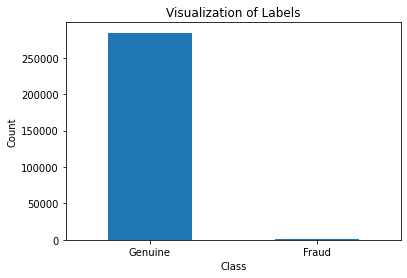

In [25]:
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

**Distributions**: By seeing the distributions we can have an idea how skewed (imbalanced) are these features. There are techniques that can help the distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future. 

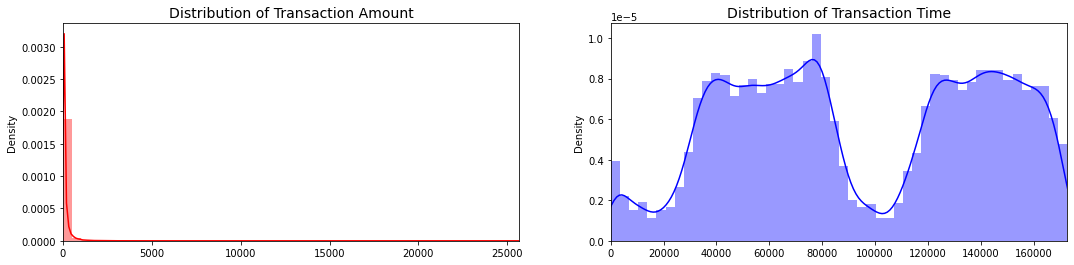

In [26]:
fix, ax = plt.subplots(1,2,figsize = (18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color = 'r')
ax[0].set_title('Distribution of Transaction Amount', fontsize = 14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize =14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

### Scaling and Distributing

In this phrase of our kernel, we will first scale the columns comprise of **Time** and **Amount**. Time and amount should be scaled as the other columns. On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases, helping our algorithms better understand patterns that determines whether a transaction is a fraud or not. 

#### What is a sub-sample?

In this scenario, our subs-ample will be a dataframe with a 50/50 ratio of fraud and non-fraud transactions. Meaning our sub-sample willl have the same amount of fraud and non fraud transaction 

#### Why do we create s sub-sample?
In the beginning of this notebook we saw that the original dataframe as heavily imbalanced! Using the original dataframe will cause the following issues:
- Overfitting: Our classification models will assume that in most cases there are no frauds! what we want for our model is to be certain when a fraud occurs
- Wrong correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

#### Summary:
- **Scaled amount** and **scaled time** are the columns with scaled values
- There are 492 cases of fraud in our dataset so we can randomly get 493 cases of non-fraud to create our new sub dataframe
- We concat the 492 cases of fraud and non fraud, creating a new sub-sample

In [27]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [28]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the data (Original Dataframe)

Before proceeding with the **Random UnderSampling technique** we have to separate the original dataframe. 

Why? For testing purposes, remember although the splitting the data when implementing **Random UnderSampling** or **OverSampling** techniques, we want to test our model on the original testing et not on the testing set created by either of these techniques. 

The main goal is to fit the model either with the dataframe that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set. 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Fraud', round(df['Class'].value_counts()[0]/len(df)*100,2), '% of the dataset')
print('Fraud', round(df['Class'].value_counts()[1]/len(df)*100,2), '% of the dataset')

X = df.drop('Class', axis = 1)
y = df['Class']

sss = StratifiedKFold(n_splits = 5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X,y):
  print("Train:", train_index, "Test:", test_index)
  original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
  original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data that is why I am using original to distinguish and to not overwrite these variables
# Original_Xtrain, original_Xtest, original_ytrain, origianl_ytest = train_test_split(X, y, test_size=0.2, random_statestate=42)

# Checkheck the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

#See if both the train and test öabel distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts = True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts = True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Fraud 99.83 % of the dataset
Fraud 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


Random Under-Sampling

In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and this avoiding our model to overfitting.

Steps:
- The first thing we have to do is determine how imbalanced is our class(use "value_counts()" in the class column to determine the amount for each label)
- Once we determine how many instances are considered **fraud transactions** (Fraud = "1"), we should bring the **non-fraud transactions** to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will implement is to shuffle the data to see of our models can maintain a certain accuracy everytime we run this script. 
- After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to **shuffle the data **to see of our mdoels can maintain a certain accuracy everytime we run this script. 

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud tramsactionn)


In [30]:
# Since our classes are highly unbalanced we should make them equivalent in order to have a normal distribution of the classes.

# Let's shuffle the data before creating the subsamples
df = df.sample(frac=1)

# amount of frsud classes 492 rows
fraud_df=df.loc[df['Class'] == 1]
non_fraud_df=df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

#Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state = 42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
167621,2.864389,0.400698,-2.044024,0.621109,-0.230739,3.003100,0.567074,0.845770,1.803081,-0.275092,-1.096747,1.149923,-1.747993,-0.096500,0.914302,-0.492253,-1.933879,0.697207,-0.890961,-0.441317,-1.288678,-1.392965,-0.127806,0.935929,0.595657,0.640234,-0.413700,-0.110223,-0.168155,-0.318255,0
6329,-0.293440,-0.906648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1
104033,-0.251520,-0.185669,1.462179,-1.042176,0.828206,-1.405215,-1.801385,-0.731549,-1.224831,-0.009640,-1.928288,1.603352,1.359813,-0.380835,-0.145590,-0.063489,0.098065,-0.027427,0.280674,0.410100,-0.020429,-0.373839,-0.315589,-0.600120,0.206669,0.461620,0.058458,-0.437053,0.037677,0.018878,0
149874,8.086774,0.087055,-1.662937,3.253892,-7.040485,2.266456,-4.177649,-0.746925,-0.248337,1.091157,-0.307137,-5.567947,2.712739,-5.948403,2.144726,-4.211756,-0.137196,-2.639409,-2.532355,-0.667067,0.626059,-0.842178,0.450381,0.521162,0.308325,-0.318012,-1.255362,-0.691963,0.264878,-0.130445,1
167184,1.172221,0.397561,-5.961457,5.313382,-6.674320,6.028975,-1.387560,0.670638,-4.128987,-4.765894,-1.005259,0.453505,4.431736,-5.142737,-1.181692,-8.755449,1.004356,-2.065026,-3.261435,0.125223,0.936966,-1.116581,5.556642,-1.501808,1.355172,0.141093,0.077913,0.473988,0.287129,1.468653,1


###Equally Distributing and Correlating:

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


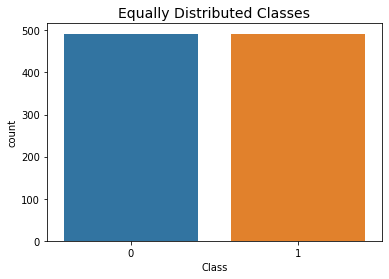

In [31]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))


sns.countplot('Class', data=new_df)
plt.title('Equally Distributed Classes', fontsize = 14)
plt.show()

### Correlation Matrices

Correlation matrices are the essence of understanding our data. 

WE want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important tthat we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions. 

###Summary and Explanation:
- Negative Correlations: V17, V14, V12 and V10 are negatively correlated. Notice how the lower these values are, the more likely the end result will be a fraud transaction. 
- Possitive Correlations: V2, V4, V12 and V19 are positively correlated. Notice how the higher these values are, the more likely the end results will be a fraud transaction. 
- BoxPlots: we will use boxplots to have a better understand of the distribution of these features in fradulent and non fradulent transactions. 

Note: We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe. 

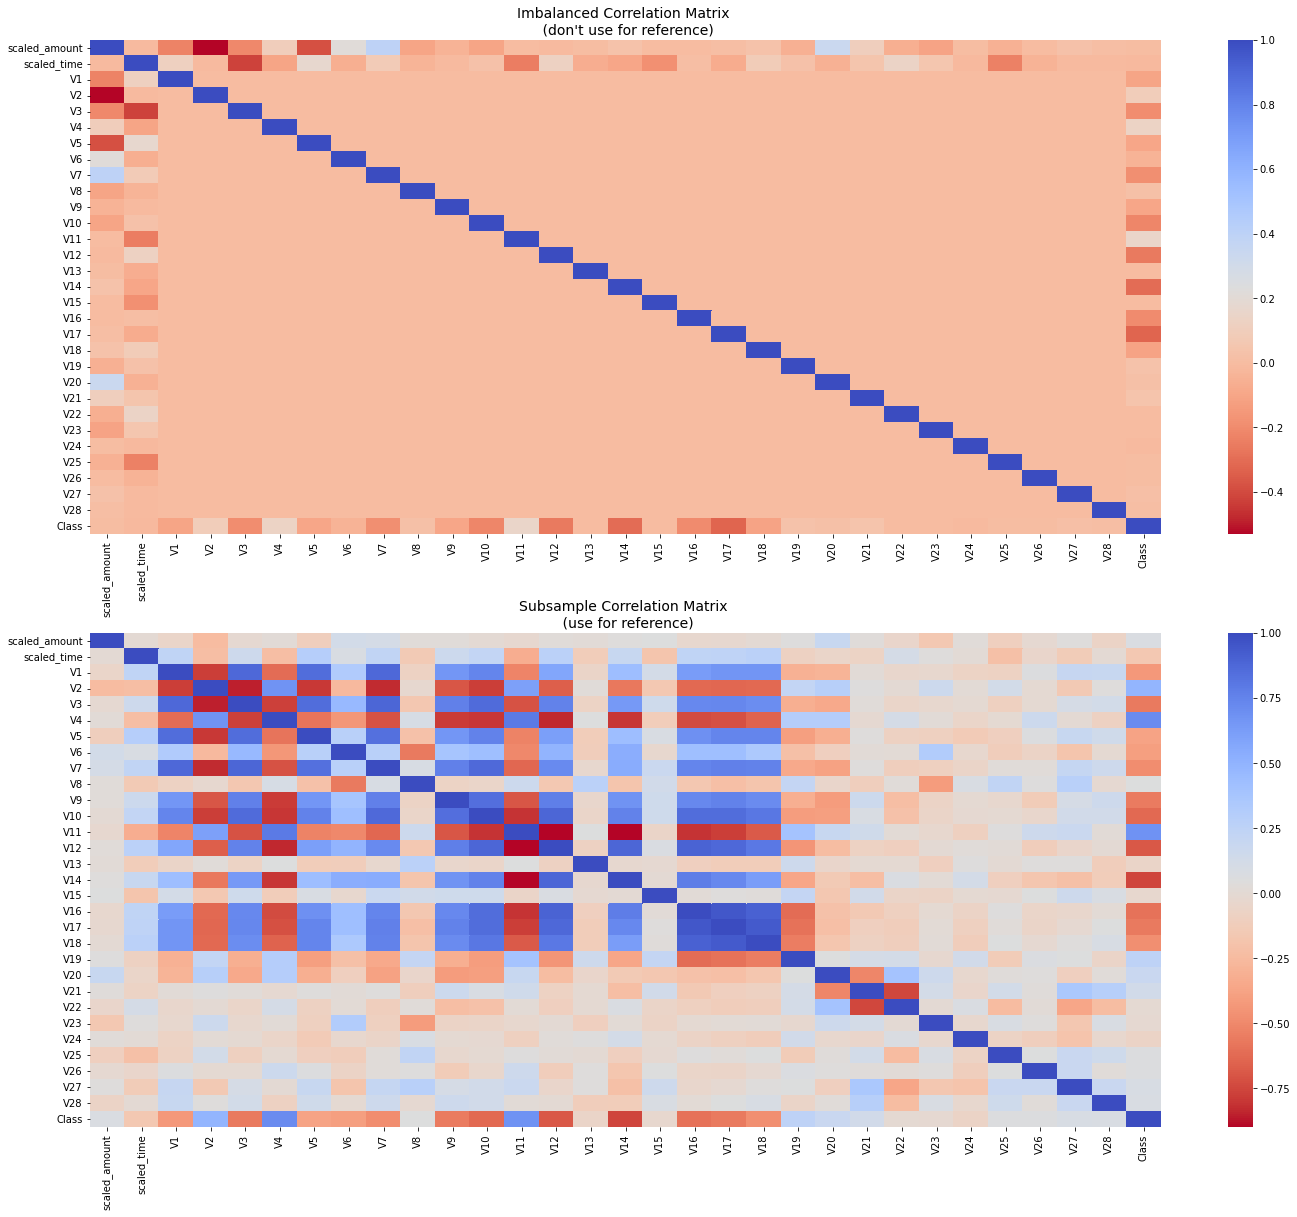

In [32]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2,1,figsize = (24, 20))

# Entire Dataframe
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws ={'size' :20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize= 14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Subsample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

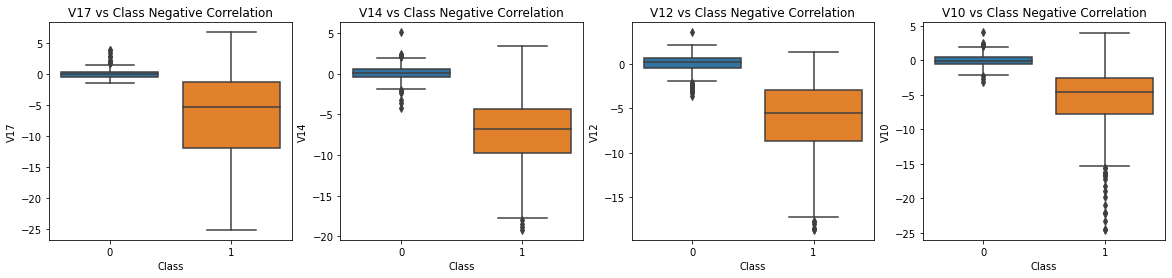

In [33]:
f, axes = plt.subplots(ncols=4, figsize =(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

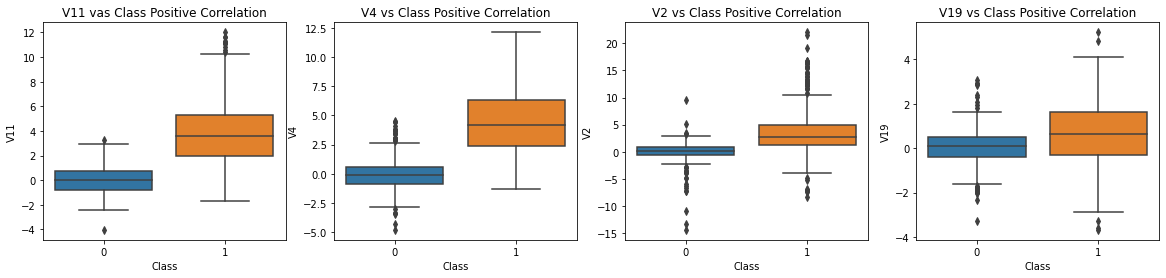

In [34]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

#Positive correlations (the higher the feature the probability increases that will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data = new_df, ax=axes[0])
axes[0].set_title("V11 vas Class Positive Correlation")

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1])
axes[1].set_title("V4 vs Class Positive Correlation")

sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2])
axes[2].set_title("V2 vs Class Positive Correlation")

sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3])
axes[3].set_title("V19 vs Class Positive Correlation")

plt.show()

###Anomaly Detection:

Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models. 

####Interquartile Range Method:
- **Interquartile Range (IQR)**: we calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted. 
- **Boxplots**: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme). 

####Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying the nu,ber (ex; 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect. 

**The Tradeoff**: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cuase our model to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

####Summary: 
- Visualise Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussuan distribution compared to features V12 and V10.
- **Determining the threshold**: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower threshold by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
- **Conditional dropping**: Lastly, we create a consitional dropping stating that if the "threshold" is exceed in both extremes, the instances will be removed.
- **Boxplot Representation**: Visualize through the boxplot that the number if "extreme outliers" have been reduced to a considerable amount.

Note: After implementing outlier reduction our accuracy has been improved by over 3%! Some outliers can distort the accuracy of our models but remember, we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting. 

Reference: More information on Interquatile Range Method: How to Use Statistics to Identify Outliers in Data by Jason Brownless (Machine Learning Mastery blog)

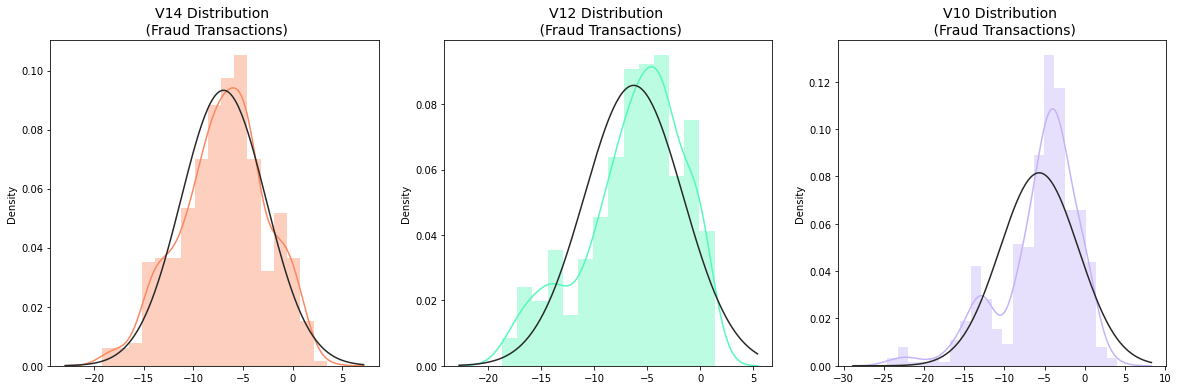

In [35]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

In [36]:
# # -----> V14 Removing Outlier (Highest Negative Correlated with Labels)

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quatile 25: {} | Quatile 75: {}'.format(q25, 75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x > v14_upper]
print('Featrue V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers: {}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values 
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('v12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature v12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' *44)

# Removing outliers V10 Feature
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values 
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quatile 25: -9.692722964972385 | Quatile 75: 75
iqr: 5.409902115485519
Cut off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Featrue V14 Outliers for Fraud Cases: 0
V10 outliers: []
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
v12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.6837146333443, -18.5536970096458, -18.0475965708216]
Feature v12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-16.6011969664137, -23.2282548357516, -15.2318333653018, -15.1241628144947, -16.2556117491401, -19.836148851696, -15.239

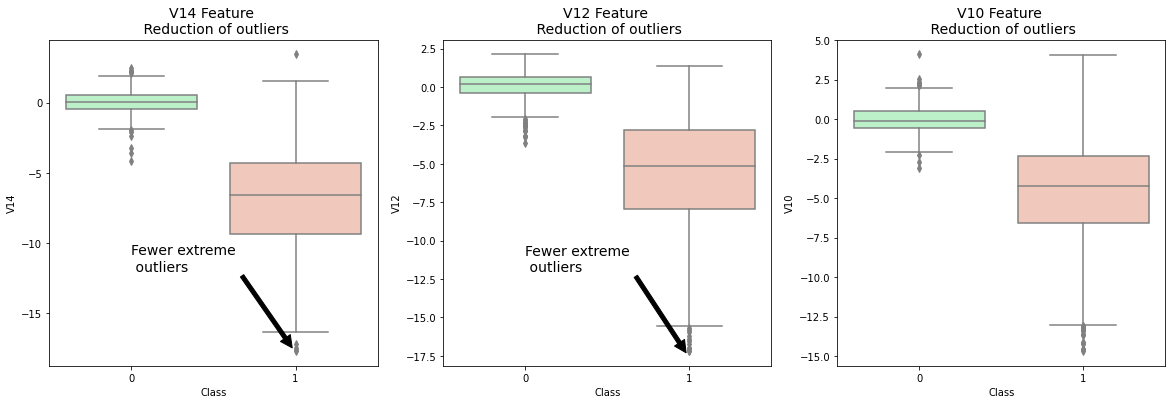

In [37]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

### Dimentionality Reduction and Clustering:

#### Understanding t-SNE:
In order to understand this algorithm you have to understand the following terms:

* **Euclidean Distance**
* **Conditional Probability**
* **Normal and T-Distribution**

Summary:
* t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset. 
* Although the subsample is pretty small, the t-SNE algorithm is able to detect clusters pretty accurately in every scenerio (I shuffle the dataset before running t-SNE)
* This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases





In [38]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

#PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1= time.time()
print("PCA took {:.2} s".format(t1-t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm = 'randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 -t0))

T-SNE took 5.2 s
PCA took 0.037 s
Truncated SVD took 0.006 s


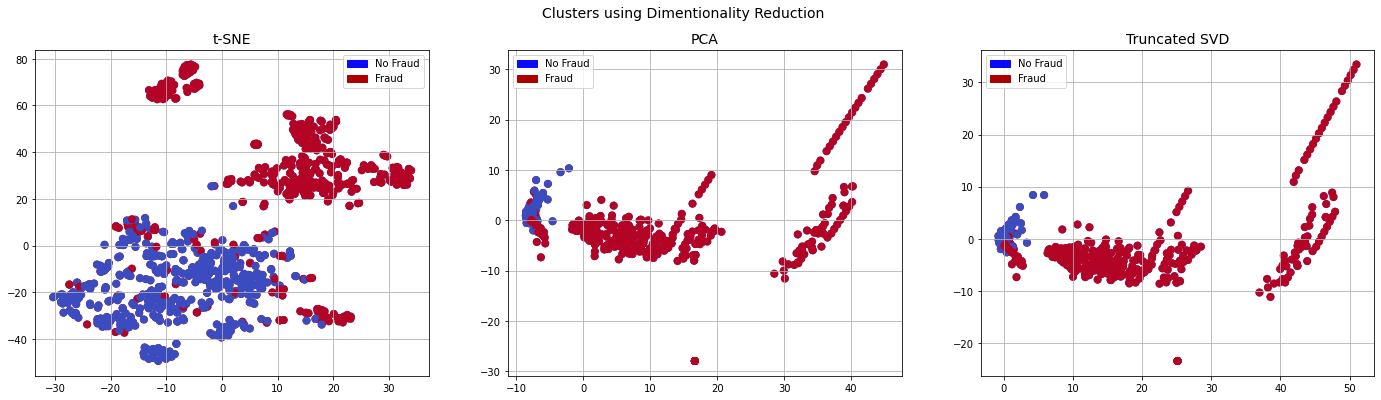

In [39]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(24,6))

#labels = ['No Fraud', 'Fraud']
f.suptitle("Clusters using Dimentionality Reduction", fontsize = 14)

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

#t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap='coolwarm', label ='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==1), cmap = 'coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

#PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y==1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

## Classifiers (UnderSampling):

In this section we will train four types of classifiers and decide which classifier will be more effective in detecting fraud transactions. Before we have to split our data into training and testing sets and separate the features from the labels.

#### Summary:

* **Logistric Regestion** classifier is more accurate than the other three classifiers in most cases (we will further analyze Logistic Regression)
* **GridSearchCV** is used to determine the parameters that gives the best predictive score for the ckassfiers.
* Logistic Regression has the best Receiving Operating Characteristic score (ROC), meaning that Logistic Regression pretty accurately separates fraud and non-fraud transactions. 

#### Learning Curves:
* The **wider the gap** between the training score and the cross validation score, the more likely your model is **overfitting (high variance).**
* If the score is low in both training and cross-validation sets this is an indication that our model is **underfitting (high bias).**
* **Logistic Regression Classifier** shows the best score in both training and cross-validating sets

In [40]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [41]:
# Our data is already scaled we should plit our training and the test sets
from sklearn.model_selection import train_test_split

#This is explicitly used for undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Turn the values into an array for feeding the classification algorithms
X_train=X_train.values
X_test = X_test.values 
y_train = y_train.values
y_test = y_test.values

In [43]:
# Let's implement simple classifiers

classifiers = {
    "LogisticRegession": LogisticRegression(), 
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(), 
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [44]:
# our scores are getting even high scores even when applying cross validation. 
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  training_score = cross_val_score(classifier, X_train, y_train, cv=5)
  print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 95.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score


In [45]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01,0.01,1,10,100,1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters. 
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)

#KNear best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vactor Classifier
svc_params = {'C': [0.5,0.7,0.9,1], 'kernel': ['rbf', 'poly','sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best extimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth":list(range(2,4,1)),
               "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree. fit(X_train, y_train)

# Tree best extimator
tree_clf = grid_tree.best_estimator_

In [46]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print("Logistic Regression Cross Validation Score: ", round(log_reg_score.mean()* 100, 2).astype(str)+'%')

knears_score =cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print("Knears Neighbors Cross Validation Score", round(knears_score.mean()*100, 2).astype(str)+'%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean()*100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.59%
Knears Neighbors Cross Validation Score 92.87%
Support Vector Classifier Cross Validation Score 94.72%
DecisionTree Classifier Cross Validation Score 93.8%


In [47]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56959  56960  56961 ... 284804 284805 284806] Test: [    0     1     2 ... 57170 57582 57724]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56959  56960  56961 ... 113932 113933 113934]
Train: [     0      1      2 ... 284804 284805 284806] Test: [108883 109323 109704 ... 170897 170898 170899]
Train: [     0      1      2 ... 284804 284805 284806] Test: [162458 162605 162928 ... 227855 227856 227857]
Train: [     0      1      2 ... 227855 227856 227857] Test: [224317 224378 224407 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})


In [48]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt
  

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

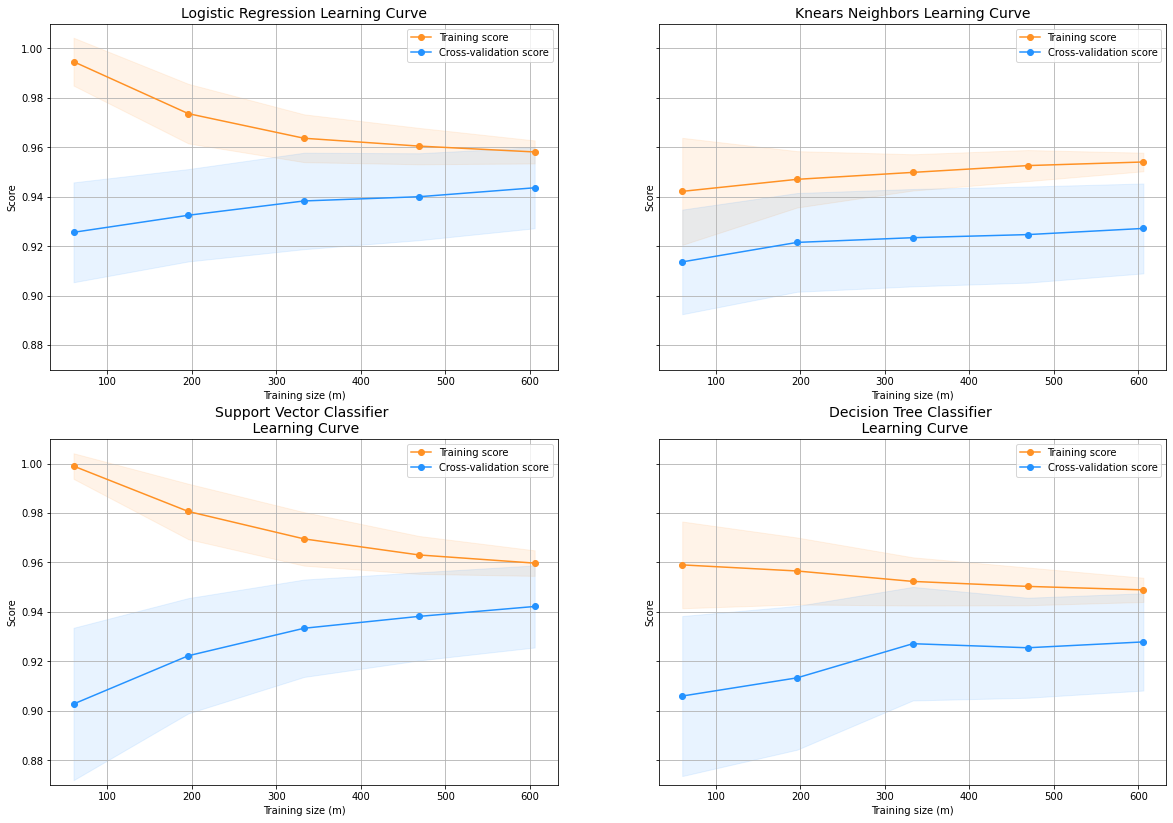

In [49]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [50]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a Data Frame with all the scores and the classifiers names

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5, method="decision_function")

knears_pred =cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5, method= "decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)



In [51]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression:', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))


Logistic Regression: 0.9771992655734043
KNears Neighbors:  0.9254892104914096
Support Vector Classifier:  0.9753562178426569
Decision Tree Classifier:  0.9334303725888538


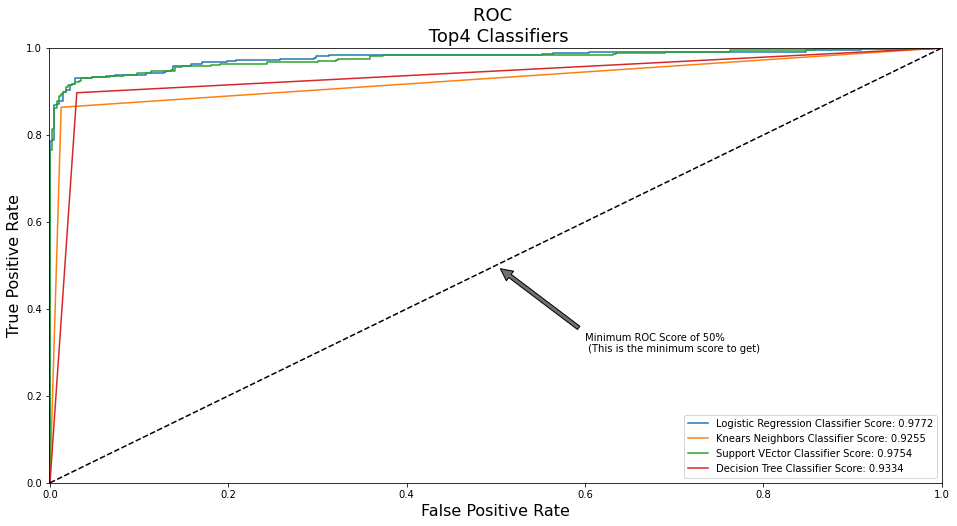

In [52]:
log_fpr, log_tpr, log_threshold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)

def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr): 
  plt.figure(figsize=(16,8))
  plt.title('ROC \n Top4 Classifiers', fontsize = 18)
  plt.plot(log_fpr, log_tpr, label = 'Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
  plt.plot(knear_fpr, knear_tpr, label='Knears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
  plt.plot(svc_fpr, svc_tpr, label='Support VEctor Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
  plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
  plt.plot([0,1],[0,1], 'k--')
  plt.axis([-0.001,1,0,1])
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
  plt.legend()

graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()



### A Deeper Look into Logistic Regression

Terms:
* **True Positives**: Correctly Classified Fraud Transactions
* **False Positives**: Incorrectly Classified Fraud Transactions
* **True Negative**: Correctly Classified Non-Fraud Transactions
* **False Negative**: Incorrectly Classified Non-Fraud Transactions
* **Precision**: True Positives/(True Positives + False Positives)
* **Recall**: True Positives/(True Positives + False Negatives)
* Precision as the name says, says **how precise (how sure) is our model in detecting fraud transactions** while recall is the amount of fraud cases our model is able to detect. 
* Precision/Recall Tradeoff: The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, let's say there are 5 fraud cases in which the model is 95% precise or more that these are fraud cases, if we lower the precision there more cases that our model will be able to detect. 

Summary:
* **Precision starts to descend** between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score.

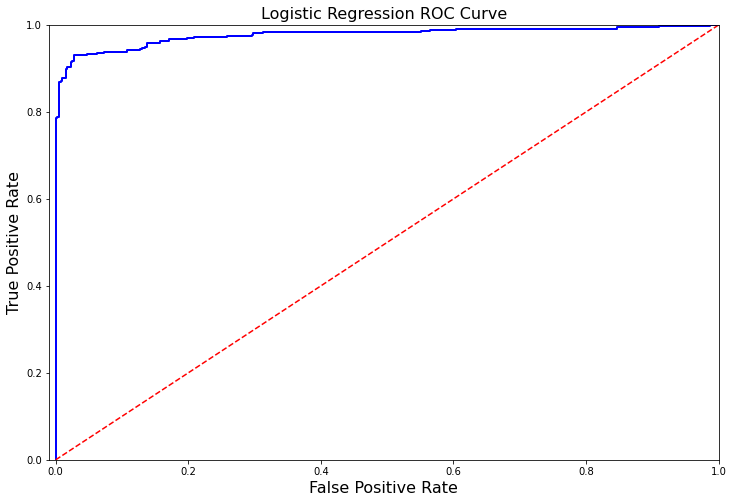

In [53]:
def logistic_roc_curve(log_fpr, log_tpr): 
  plt.figure(figsize=(12,8))
  plt.title('Logistic Regression ROC Curve', fontsize=16)
  plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
  plt.plot([0,1], [0,1], 'r--')
  plt.xlabel('False Positive Rate', fontsize=16)
  plt.ylabel('True Positive Rate', fontsize=16)
  plt.axis([-0.01,1,0,1])

logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [54]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold=precision_recall_curve(y_train, log_reg_pred)

In [55]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

#Overfitting Case
print('---' *45)
print('Overfitting: \n')
print('Recall score: {:.2f}'. format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'. format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

#How it should look like 
print('---' *45)
print('How it should be: \n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---'*45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall score: 0.94
Precision Score: 0.71
F1 Score: 0.81
Accuracy Score: 0.79
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be: 

Accuracy Score: 0.59
Precision Score: 0.00
Recall Score: 0.43
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [56]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [57]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recal score: {0:0.2f}'.format(undersample_average_precision))



Average precision-recal score: 0.03


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average precision-recall Score= 0.03')

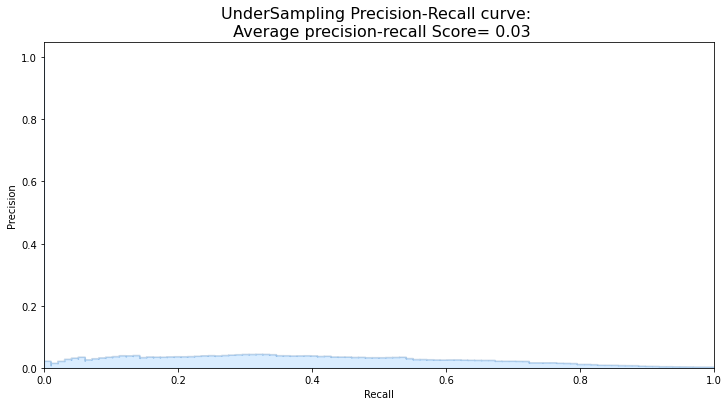

In [58]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, where='post', color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average precision-recall Score= {0:0.2f}'.format(undersample_average_precision), fontsize=16)

##SMOTE Technique(OverSampling):

SMOTE_R_visualisation_3.png

 SMOTE stands for **Synthetic Minority Over-sampling Technique**. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". 
    
  
Understanding SMOTE:

* Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
* Local of the syntheyic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points
* Final Effect: More information in retained since we didn't have to delete any rows unlike in random undersampling. 
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated. 
   
      
Cross validation Overfitting Mistake:
 #### Overfitting during Cross Validation: 
 
 In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. it is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing crossvalidation causing a "data leakage" problem. **In the following section you will see amazing precision and recall scores but in reality our data is overfitting**

The Wrong Way:

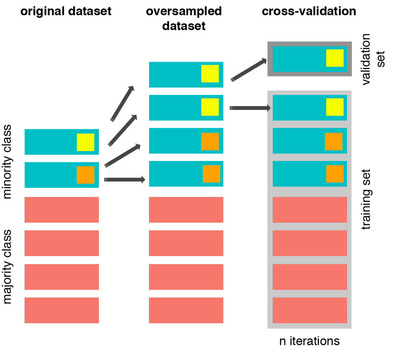

AS mentioned previously, id we get the minority class ("Fraud") in our case, amd create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting into 5 batches, 4/5 of the dataset willbe training set while 1/5 will be validation set. The test set should not be touched! **For that reason, we have to do the creation of the synthetics datapoints "during" cross-validation and not before, just like below:**

The right way:


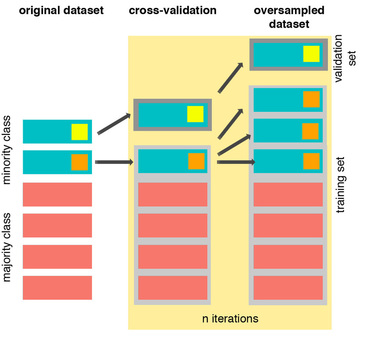

As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training without affecting the validation set.

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters

log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
# Logistic Regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01,0.01,1,10,100,1000]}

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 227846 | Length of y (train): 227846
Length of X (test): 56961 | Length of y (test): 56961
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9708752380772276
precision: 0.06649449960074191
recall: 0.9137617656604998
f1: 0.12272659211797063
---------------------------------------------------------------------------------------------------------------------------------------


In [60]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.99      0.99     56863
       Fraud       0.11      0.86      0.20        98

    accuracy                           0.99     56961
   macro avg       0.56      0.92      0.59     56961
weighted avg       1.00      0.99      0.99     56961



In [61]:
y_score = best_est.decision_function(original_Xtest)

In [62]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.74


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score = 0.74')

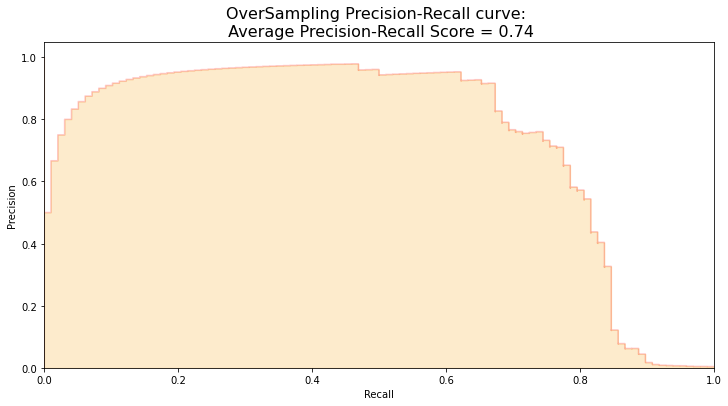

In [63]:
fig= plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2, where = 'post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score = {0:0.2f}'.format(average_precision), fontsize=16)

In [64]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [65]:
# We improve the score by 2% points appreoximately
# Implement GridSearchCV and the other models

#Logistic Regression
t0= time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversamole data took : {} sec".format(t1 - t0))

Fitting oversamole data took : 12.376488447189331 sec


#### Test Data with Logistic Regression:

Cofusion Matrix:

* **Positive/Negative**: Type of Class(label) ["No", "Yes"]. **True/False**: Correctly or Incorrectly classified by the model
* **True Negatives (Top-Left Square)**: This is the number of **correctly **classifications of the "No" (No Fraud Detected) class.
* **False Negatives (Top-Right Square)**: This is the number of **incorrectly** classifications of the "No"(No Fraud Detected) class. 
* **False Positives (Bottom-Left Square)**: This is the numer of **incorrectly** classification of the "Yes" (Fraud Detected) class
* **True Positives (Bottom-Right Square)**: This is the number of **correctly** classification of the "Yes" (Fraud Detected) class

Summary: 
* **Random UnderSampling**: we will evaluate the final performance of the classification models in the random undersampling subset. **Keep in mind that this is not the data from the original dataframe.**
* **Classification Models**: The models that performed the best were **logistic regression** and support vector classifier (SVM)


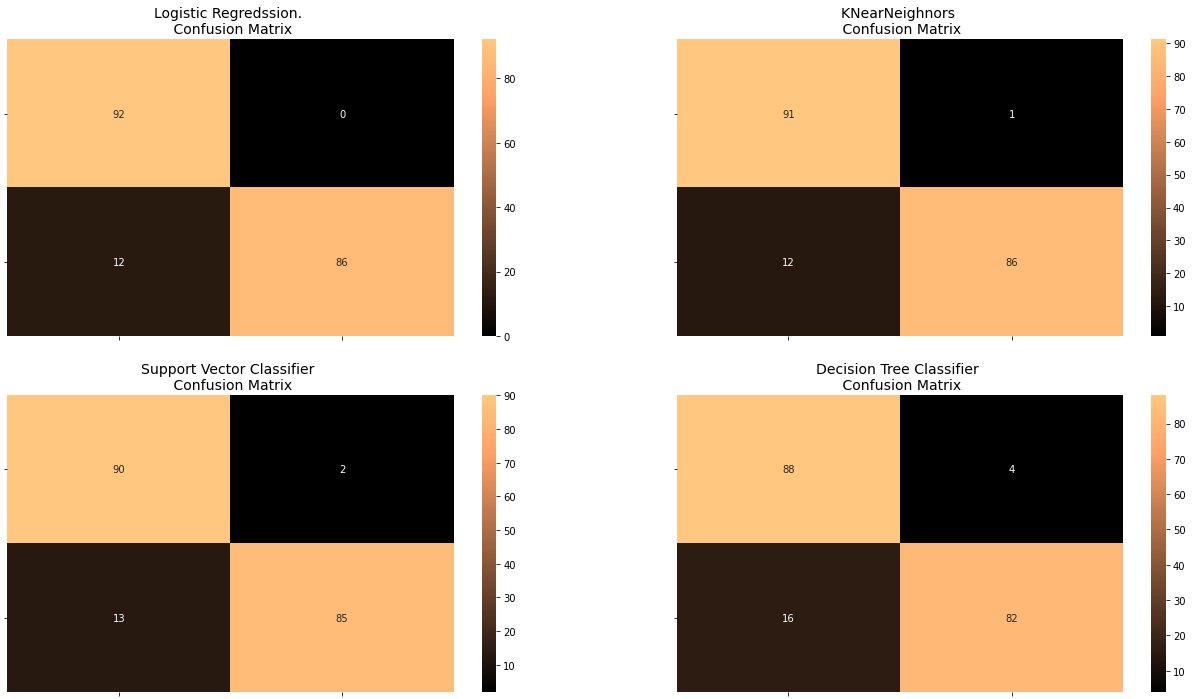

In [66]:
from sklearn.metrics import confusion_matrix 

#Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

#Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)

log_reg_cf =confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf =confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf= confusion_matrix(y_test, y_pred_tree)

fig, ax= plt.subplots(2,2, figsize=(22,12))

sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper) 
ax[0,0].set_title("Logistic Regredssion. \n Confusion Matrix", fontsize=14)
ax[0,0].set_xticklabels(['',''], fontsize=14, rotation = 90)
ax[0,0].set_yticklabels(['',''], fontsize = 14, rotation = 360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap= plt.cm.copper)
ax[0][1].set_title("KNearNeighnors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['',''], fontsize=14, rotation = 90)
ax[0][1].set_yticklabels(['',''], fontsize = 14, rotation = 360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap= plt.cm.copper)
ax[1][0].set_title("Support Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['',''], fontsize=14, rotation = 90)
ax[1][0].set_yticklabels(['',''], fontsize = 14, rotation = 360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap= plt.cm.copper)
ax[1][1].set_title("Decision Tree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['',''], fontsize=14, rotation = 90)
ax[1][1].set_yticklabels(['',''], fontsize = 14, rotation = 360)

plt.show()

In [67]:
from sklearn.metrics import classification_report

print('Logistic Regression: ')
print(classification_report(y_test, y_pred_log_reg))
                            
print('Knears Neighbors: ')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier: ')
print(classification_report(y_test, y_pred_svc))

print('Support Decision Tree Classifier: ')
print(classification_report(y_test, y_pred_tree))

Logistic Regression: 
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        92
           1       1.00      0.88      0.93        98

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

Knears Neighbors: 
              precision    recall  f1-score   support

           0       0.88      0.99      0.93        92
           1       0.99      0.88      0.93        98

    accuracy                           0.93       190
   macro avg       0.94      0.93      0.93       190
weighted avg       0.94      0.93      0.93       190

Support Vector Classifier: 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        92
           1       0.98      0.87      0.92        98

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weigh

We can see that:
- precision
- recall
- f1-score
- accuracy

In [68]:
#Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

#Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

#Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)

d= {'Technique': ['Radom UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df =pd.DataFrame(data=d)

# Move column
score=final_df['Score']
final_df.drop('Score', axis = 1, inplace = True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading!
final_df

,Technique,Score
0,Radom UnderSampling,0.936842
1,Oversampling (SMOTE),0.987869


## Neral Networks Testing Random UnderSampling Data vs OverSampling (SMOTE)
In this section we will implement a simple Neural Network (with one hidden layer) in order to see which of the two logistic regressions mdoels we implemented in the (undersample or oversample (SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions. 

### Our main goal

Our main goal is to explore how our simple neural network behaves in both the random undersamole and oversample dataframes and see whether they can predict accuratly both non-fraud and fraud cases. Why not only focus on fraud?
Imagine you were the cardholder and after you purchases and item your card gets blocked because the bank's algorithm though your purchase was a fraud. That's why we should emphasize only in detecting fraud cases but we should also emphasize correctly categorizing non-fraud transactions. 

### The Confusion Matrix:

Here is again, how the confusion matrix works:

* **Upper Left Square**: The amount of **correctly** classified by our model of no fraud transactions.
* **Upper Right Square**: The amount of **incorrectly** classified transactions as fraud cases, but the actual label is no fraud
* **Lower Left Square**: The amount of **incorrectly** classified transactions as no fraud cases, but the actual label is fraud
* **Lower Right Square**: The amount of **correctly**classified by our model of fraud transactions
 

### Keras || Random UnderSampling

* **Data**: In this final phase of testing we will fit this mdoel in both the **random undersampled subset** and **oversampled dataset (SMOTE)** in order to predict the final result using the **original dataframe testing data**.
* **Neural Network Structure**: AS stated previously, this will be a simple model composed of one input layer (where the number of nodes equals the numer of features) plus bias node, one hidden layer with 32 ndoes and one output node composed of two possible results 0 or 1 (No Fraud or Fraud)
* **Other characteristics** : The learning rate will be 0.001, the optimizer we will use is the **AdamOptimizer**, the activation function that is used in this scenerio is **"RELU"** and for the final outputs we will use **sparse categorical cross entropy**, which gives the probability whether an instance case is no fraud and fraud (the prediction will pick the highest probability between the two).

Keyword explaination:
- AdamOptimizer:
- Sparse categirical cross entropy
- RELU
- Tensorfloe sequential verbose

In [71]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([Dense(n_inputs, input_shape = (n_inputs, ), activation = 'relu'), Dense(32,activation = 'relu'), Dense(2, activation='softmax')])


In [72]:
undersample_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 1,988
Trainable params: 1,988
Non-trainable params: 0
_________________________________________________________________


In [73]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [74]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs = 20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 1s - loss: 0.6800 - accuracy: 0.5330 - val_loss: 0.4195 - val_accuracy: 0.8026 - 746ms/epoch - 30ms/step
Epoch 2/20
25/25 - 0s - loss: 0.3995 - accuracy: 0.8168 - val_loss: 0.2961 - val_accuracy: 0.9342 - 54ms/epoch - 2ms/step
Epoch 3/20
25/25 - 0s - loss: 0.2946 - accuracy: 0.9142 - val_loss: 0.2347 - val_accuracy: 0.9408 - 64ms/epoch - 3ms/step
Epoch 4/20
25/25 - 0s - loss: 0.2324 - accuracy: 0.9406 - val_loss: 0.2038 - val_accuracy: 0.9408 - 51ms/epoch - 2ms/step
Epoch 5/20
25/25 - 0s - loss: 0.1947 - accuracy: 0.9505 - val_loss: 0.1921 - val_accuracy: 0.9408 - 74ms/epoch - 3ms/step
Epoch 6/20
25/25 - 0s - loss: 0.1693 - accuracy: 0.9538 - val_loss: 0.1792 - val_accuracy: 0.9408 - 66ms/epoch - 3ms/step
Epoch 7/20
25/25 - 0s - loss: 0.1508 - accuracy: 0.9521 - val_loss: 0.1730 - val_accuracy: 0.9408 - 71ms/epoch - 3ms/step
Epoch 8/20
25/25 - 0s - loss: 0.1384 - accuracy: 0.9554 - val_loss: 0.1698 - val_accuracy: 0.9276 - 60ms/epoch - 2ms/step
Epoch 9/20
25/25 - 0s 

In [75]:
undersample_predictions= undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [94]:
undersample_fraud_predictions = np.argmax((undersample_model.predict(original_Xtest, batch_size=200, verbose=0)), axis = 1)

In [95]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[55508  1355]
 [   10    88]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


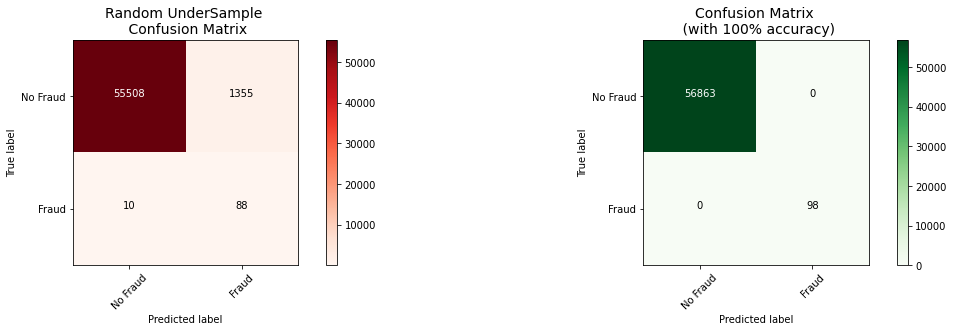

In [96]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Keras || OverSampling (SMOTE)

In [100]:
n_inputs = Xsm_train.shape[1]

oversample_model =Sequential([Dense(n_inputs, input_shape=(n_inputs, ), activation = 'relu'), Dense(32, activation ='relu'), Dense(2, activation='softmax')])

In [102]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics= ['accuracy'])

In [103]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 4s - loss: 0.0639 - accuracy: 0.9754 - val_loss: 0.0210 - val_accuracy: 0.9982 - 4s/epoch - 3ms/step
Epoch 2/20
1214/1214 - 3s - loss: 0.0112 - accuracy: 0.9978 - val_loss: 0.0051 - val_accuracy: 0.9998 - 3s/epoch - 3ms/step
Epoch 3/20
1214/1214 - 4s - loss: 0.0061 - accuracy: 0.9988 - val_loss: 0.0025 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 4/20
1214/1214 - 3s - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0020 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 5/20
1214/1214 - 4s - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0012 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 6/20
1214/1214 - 4s - loss: 0.0029 - accuracy: 0.9995 - val_loss: 0.0017 - val_accuracy: 1.0000 - 4s/epoch - 3ms/step
Epoch 7/20
1214/1214 - 3s - loss: 0.0026 - accuracy: 0.9995 - val_loss: 9.1289e-04 - val_accuracy: 1.0000 - 3s/epoch - 3ms/step
Epoch 8/20
1214/1214 - 3s - loss: 0.0024 - accuracy: 0.9995 - val_loss: 0.0016 - val_accuracy: 0.9999 - 3s/epoch - 3ms/step
Epoc

In [104]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size= 200, verbose=0)

In [105]:
oversample_fraud_predictions= np.argmax(oversample_predictions, axis=1)

Confusion matrix, without normalization
[[56850    13]
 [   29    69]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


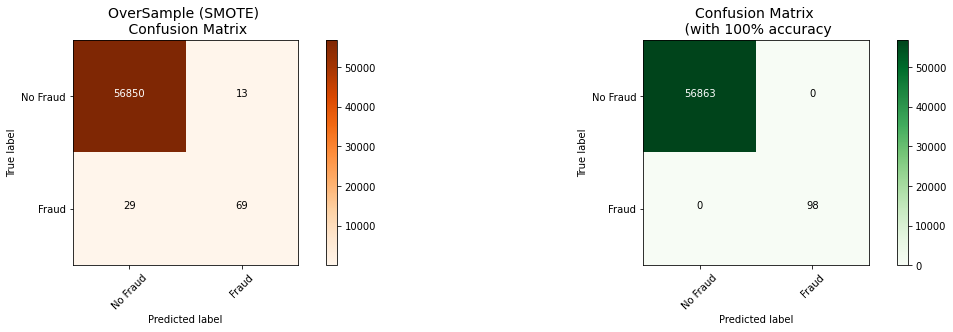

In [108]:
oversample_smote= confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud','Fraud']

fig=plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap = plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy", cmap=plt.cm.Greens)

##Conlusion

- Implementing SMOTE on our imbalanced dataset helped is with the imbalance of our labels (more no fraud than fraud transactions. 
- Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset.
- However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people were making regular purchases got their card blocked due to the reason that our model classsified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution.
- The number of customer complaints ans customer disatisfaction will increase. The next step step of this analysis will be to do an outlier removal on our oversample dataset and see if our accuracy in test set improve.

#### Note: 
One last thing, predictions and accuracies may be subjected to change since I implemented data shuffling on both types. of dataframes. The main thing is to see if our models are able to correctly classify no fraud and fraud transactions. 
